In [268]:
import pandas as pd
import numpy as np
from numpy import median
import matplotlib.pyplot as plt
import seaborn as sns

import us
from datetime import datetime, timezone

pd.set_option('display.max_columns', 999)

In [269]:
data_path = "C:/Users/armcl/Python/Springboard_Cap2/Data/" #Home
#data_path = "C:/Users/yyzhao/python/Springboard/Capstone2/Data/" #Work

In [270]:
#Read customers data
customers = pd.read_csv(data_path + "Subscription/customers.csv", encoding="utf8")

customers = customers.drop(columns = ['note','ship_street','ship_unit','location',
                                     'wrr','last4','source','customer_metadata',
                                     'ship_phone_number'])

#revenue and mrr need to be divided by 100
customers[['total_revenue','mrr']] = customers[['total_revenue','mrr']]/100

#some observations are missing location data, # of orders, and might have wrong name
#will investigate once merged with other data


In [271]:
#mrr: monthly recurring revenue
#mixed subscription status: once subscribed, cancelled, subscribed again
customers.head(2)

,customer_id,first_name,last_name,american,name,email,ship_to,ship_city,ship_state,ship_zip_code,ship_country,country,total_revenue,mrr,num_orders,num_subscriptions,subscription_status,payment_provider,marketplace_source
0,2739202452,Jennifer,Ting,0,Jennifer Ting,muchenting@hotmail.com,Jennifer Ting,San Ramon,CA,94583,US,US,275.0,23.75,1,1,active,STRIPE,False
1,2729781565,Caelyn,Furman,1,Caelyn Furman,caelyn.furman@gmail.com,Caelyn Furman,Avondale Esates,GA,30002,US,US,185.9,0.00,2,0,none,STRIPE,False


In [272]:
customers.shape

(1320, 19)

In [273]:
customers.describe()

,customer_id,american,total_revenue,mrr,num_orders,num_subscriptions
count,1.320000e+03,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000
mean,2.053670e+09,0.053030,129.265508,6.450795,3.173485,1.017424
std,3.030278e+08,0.224179,172.433666,11.453050,3.426392,0.555215
min,7.880641e+07,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.864414e+09,0.000000,17.960000,0.000000,1.000000,1.000000
50%,1.937069e+09,0.000000,52.875000,0.000000,2.000000,1.000000
75%,2.279912e+09,0.000000,197.770000,20.900000,4.000000,1.000000
max,2.739202e+09,1.000000,1468.920000,95.000000,22.000000,5.000000


In [274]:
##More avg revenue from American families need to focus more on this market
#Analyze state
family_analysis = pd.DataFrame({'count' : customers.groupby( [ 'american'] ).size()})
family_analysis['avg_revenue']=customers.groupby('american').mean()['total_revenue']
family_analysis['total_revenue']= family_analysis['count']*family_analysis['avg_revenue']
family_analysis.sort_values('total_revenue', ascending=False)

,count,avg_revenue,total_revenue
american,,,
0,1250,126.351360,157939.20
1,70,181.303857,12691.27


In [275]:
#add median
customers.groupby('american').median()['total_revenue']

american
0    51.860
1    80.925
Name: total_revenue, dtype: float64

In [276]:
#Analyze state
#Texas shows one of the highest revenue in mean and median
state_analysis = pd.DataFrame({'count' : customers.groupby( [ 'ship_state'] ).size()})
state_analysis['avg_revenue']=customers.groupby('ship_state').mean()['total_revenue']
state_analysis['median_revenue']=customers.groupby('ship_state').median()['total_revenue']

state_analysis['total_revenue']= state_analysis['count']*state_analysis['avg_revenue']
state_analysis.sort_values('total_revenue', ascending=False)

,count,avg_revenue,median_revenue,total_revenue
ship_state,,,,
CA,503,114.867256,46.250,57778.23
WA,121,137.580826,64.900,16647.28
TX,82,180.316951,78.300,14785.99
NY,95,129.835158,57.120,12334.34
NJ,54,149.992963,60.375,8099.62
OH,34,201.547647,76.330,6852.62
PA,45,145.669111,84.850,6555.11
MA,39,161.445385,92.700,6296.37
MD,41,139.972195,19.950,5738.86


In [277]:
#More revenue from American families need to focus more on this market
customers.groupby('american').mean()

,customer_id,total_revenue,mrr,num_orders,num_subscriptions,marketplace_source
american,,,,,,
0,2.056710e+09,126.351360,6.374573,3.1664,1.016800,0.002400
1,1.999398e+09,181.303857,7.811905,3.3000,1.028571,0.042857


In [278]:
payment_count = customers.groupby('payment_provider').size()

payment_count/payment_count.sum()

payment_provider
PAYPAL    0.307692
STRIPE    0.692308
dtype: float64

In [279]:
#sub_status = customers.groupby('subscription_status').size()

#sub_status/sub_status.sum()

In [280]:
#Median Revenue by Subscription Status
#Mixed shows the highest total revenue and num of orders, there are many reasons:
#1) clients subscribed, cancelled(didn't like at first, on vacation), came back and subscribed again
#2) accidentally ordered more than needed and cancelled
#3) clients ordered gifts for friends and cancelled/expired later
#4) currently cancelled and there were expired gifts
#5) clients tried several ages first and decided to keep one that fits child's age

#It's hard to interpret with all these different factors
#Need to combine with subscription and cancellation reason data for better information
#For example: cancelled+active vs. cancelled+expired
#customers.groupby('subscription_status').mean()

In [281]:
#Subscription Data

#Use email to merge
#Fullfillment status == 'cancelled': this probably means 
#1)when total_revenue = 0: accidental orders
#2)when total_revenue is not 0 and refunded mad customers

#Date, need to convert to local time for timing analysis, default is PDT
#Questions like1) what time do peoplel like to subscribe/cancel 2)when do they like to open emails and take actions

subscriptions = pd.read_csv(data_path + "Subscription/subscriptions.csv", encoding="utf8")

#Drop columns with all NAs
subscriptions = subscriptions.dropna(axis=1, how='all')

#revenue to numeric
subscriptions['Total Revenue'] = subscriptions['Total Revenue'].replace('[\$,]', '', regex=True).astype(float)

#subscriptions.head(2)

In [282]:
#Merge several columns

subscriptions['Subscription_Product'] = subscriptions[['Subscription Product 1','Subscription Product 2','Subscription Product 3',
               'Subscription Product 4','Subscription Product 5']].apply(lambda x: x.str.cat(sep=''), axis=1)

#Product name changed but essentially the same
subscriptions['Subscription_Product'] = subscriptions['Subscription_Product'].replace({'0-2岁熊猫金袋':'0-2 box',
                                                                                     '0-2岁熊猫盒子':'0-2 box',
                                                                                       '2-5岁熊猫金袋':'2-5 box',
                                                                                     '2-5岁熊猫盒子':'2-5 box',
                                                                                       '5岁+熊猫金袋':'5+ box',
                                                                                     '5岁+熊猫盒子':'5+ box'})

subscriptions['Child_Age'] = subscriptions[[' Subscription Product 1 Survey Field: 宝宝现在几岁了？* ',' Subscription Product 2 Survey Field: 宝宝现在几岁了？* ',' Subscription Product 3 Survey Field: 宝宝现在几岁了？* ',
               ' Subscription Product 4 Survey Field: 宝宝现在几岁了？* ',' Subscription Product 5 Survey Field: 宝宝现在几岁了？* ']].apply(lambda x: x.dropna().astype(str).str.cat(sep=''), axis=1)

subscriptions['Child_Age'] = pd.to_numeric(subscriptions['Child_Age'], errors='coerce')

#age 0 is showing as NA, change them to 0 again
subscriptions['Child_Age'].fillna(0, inplace=True)

subscriptions['Child_Gender'] = subscriptions[['Subscription Product 1 Survey Field: 男娃女娃？*','Subscription Product 2 Survey Field: 男娃女娃？*','Subscription Product 3 Survey Field: 男娃女娃？*',
               'Subscription Product 4 Survey Field: 男娃女娃？*','Subscription Product 5 Survey Field: 男娃女娃？*']].apply(lambda x: x.str.cat(sep=''), axis=1)

subscriptions['Child_Gender'] = subscriptions['Child_Gender'].replace('Girl 女孩','Girl')
subscriptions['Child_Gender'] = subscriptions['Child_Gender'].replace('Boy 男孩','Boy')

subscriptions['Coupon_Used_List'] = subscriptions[['Active Coupon 1','Inactive Coupon 1','Inactive Coupon 2',
               'Inactive Coupon 3']].apply(lambda x: x.str.cat(sep=','), axis=1)

#Create a new variable: if coupon used or not
subscriptions['Coupon_Used'] = 'Used_Coupon'
subscriptions.loc[subscriptions['Coupon_Used_List']=='','Coupon_Used'] = 'Not_Used_Coupon'

subscriptions['Is a Gift'] = subscriptions['Is a Gift'].replace({True:'Gift',False:'Not_Gift'})


subscriptions = subscriptions[subscriptions.columns[~subscriptions.columns.str.contains('Survey')]]
subscriptions = subscriptions[subscriptions.columns[~subscriptions.columns.str.contains('Subscription Product')]]
subscriptions = subscriptions[subscriptions.columns[~subscriptions.columns.str.contains('Inactive Coupon')]]
subscriptions = subscriptions[subscriptions.columns[~subscriptions.columns.str.contains('Active Coupon 1')]]
subscriptions = subscriptions[subscriptions.columns[~subscriptions.columns.str.contains('Billing')]]
subscriptions = subscriptions[subscriptions.columns[~subscriptions.columns.str.contains('Recipient')]]


In [283]:
#Deal with time

subscriptions['Start_Date_dt']= pd.to_datetime(subscriptions['Start Date']+'/'+subscriptions['Start Date Time'])
subscriptions['End_Date_dt']= pd.to_datetime(subscriptions['End Date']) 
subscriptions['Cancel_Date_dt']= pd.to_datetime(subscriptions['Last Cancel Date']+'/'+subscriptions['Last Cancel Date Time'].astype(str).str[:-5])
subscriptions['Cancel_Date_dt'].fillna('', inplace=True)

#Conver to local time based on country and state
#Create Time Zones
subscriptions['Time_Zone'] = subscriptions.apply(
    lambda row : us.states.lookup(row['Shipping Province']).capital_tz if ((row['Shipping Country']=='US') & (row['Shipping Province']!='AE')) else "", axis = 1) 

subscriptions.loc[(subscriptions['Shipping Country']=='US') 
                  & (subscriptions['Shipping Province']=='AE'),'Time_Zone'] = 'America/Los_Angeles'

subscriptions.loc[(subscriptions['Shipping Country']=='CA') 
                  & (subscriptions['Shipping Province']=='AB'),'Time_Zone'] = 'America/Denver'

subscriptions.loc[(subscriptions['Shipping Country']=='CA') 
                  & (subscriptions['Shipping Province']=='ON'),'Time_Zone'] = 'America/New_York'

subscriptions.loc[subscriptions['Shipping Country']=='MY','Time_Zone'] = 'Asia/Kuala_Lumpur'

subscriptions['Start_Date_Long'] = subscriptions.apply(lambda row : row['Start_Date_dt'].tz_localize('America/Los_Angeles').tz_convert(row['Time_Zone']), axis = 1)

subscriptions['Cancel_Date_Long'] = subscriptions.apply(lambda row : row['Cancel_Date_dt'].tz_localize('America/Los_Angeles').tz_convert(row['Time_Zone']) if row['Cancel_Date_dt']!='' else "", axis = 1)



In [284]:
#Create new features

#Window from subscription to cancellation
subscriptions.loc[subscriptions['Cancel_Date_Long']!='','canceled_tenure'] = subscriptions.loc[subscriptions['Cancel_Date_Long']!='','Cancel_Date_Long'] - subscriptions.loc[subscriptions['Cancel_Date_Long']!='','Start_Date_Long']
subscriptions['canceled_tenure'] = subscriptions.apply(lambda row: row['canceled_tenure'].days,axis=1)

#Tenue for active subscribers
subscriptions.loc[subscriptions['Cancel_Date_Long']=='','active_tenure'] = datetime.now() - pd.to_datetime(subscriptions['Start Date'])
subscriptions['active_tenure'] = subscriptions.apply(lambda row: row['active_tenure'].days,axis=1)

#subscribed/cancelled date and time
subscriptions['subscribe_date'] = subscriptions.apply(lambda row: row['Start_Date_Long'].day if row['Start_Date_Long']!='' else '',axis=1)
subscriptions['subscribe_hour'] = subscriptions.apply(lambda row: row['Start_Date_Long'].hour if row['Start_Date_Long']!='' else '',axis=1)
subscriptions['cancel_date'] = subscriptions.apply(lambda row: row['Cancel_Date_Long'].day if row['Cancel_Date_Long']!='' else '',axis=1)
subscriptions['cancel_hour'] = subscriptions.apply(lambda row: row['Cancel_Date_Long'].hour if row['Cancel_Date_Long']!='' else '',axis=1)


In [285]:
#Merge subscriptions with customer data to get the ethnics
subscriptions = pd.merge(subscriptions, customers[['email','american','payment_provider']], left_on = 'Email', right_on='email', how='left')

In [286]:
#Create dummy variables
subscriptions = pd.concat([subscriptions, subscriptions['Subscription_Product'].str.get_dummies(sep=',')], axis=1)
subscriptions = pd.concat([subscriptions, subscriptions['Term'].str.get_dummies(sep=',')], axis=1)
subscriptions = pd.concat([subscriptions, subscriptions['Status'].str.get_dummies(sep=',')], axis=1)
subscriptions = pd.concat([subscriptions, subscriptions['Coupon_Used'].str.get_dummies(sep=',')], axis=1)
subscriptions = pd.concat([subscriptions, subscriptions['Is a Gift'].str.get_dummies(sep=',')], axis=1)
#subscriptions = pd.concat([subscriptions, subscriptions['Source'].str.get_dummies(sep=',')], axis=1)
subscriptions = pd.concat([subscriptions, subscriptions['Child_Gender'].str.get_dummies(sep=',')], axis=1)
subscriptions = pd.concat([subscriptions, subscriptions['Coupon_Used_List'].str.get_dummies(sep=',')], axis=1)
subscriptions = pd.concat([subscriptions, subscriptions['payment_provider'].str.get_dummies(sep=',')], axis=1)

#Create a new variable number of coupons used
subscriptions['Num_Coupons_Used'] = subscriptions.loc[:,'1STPANDA10OFF':'ZYLYZXY'].sum(axis=1)

#Remove features not relevant
subscriptions = subscriptions.drop(columns=['Start Date','Start Date Time','End Date',
                                           'Last Cancel Date','Last Cancel Date Time',
                                           'Auto-Renewing Subscription','Source','Shipping Address 1',
                                           'Shipping Address 2','Time_Zone','email','payment_provider',
                                           'Coupon_Used_List'])

#If fullfillment status = cancelled AND revenue = 0 
#Then these are accidentally placed duplicate orders, and cancelled by the merchant need to remove from the data

subscriptions = subscriptions.drop(subscriptions[(subscriptions['Fulfillment Status'] == 'CANCELLED') & (subscriptions['Total Revenue'] == 0)].index)

#Also, remove VIP FREE subscriptions 
subscriptions = subscriptions.loc[subscriptions['DIYA']!=1,:]
subscriptions = subscriptions.loc[subscriptions['USMAMAVIP']!=1,:]
subscriptions = subscriptions.loc[subscriptions['MESSYCOWVIP']!=1,:]

In [287]:
subscriptions.head(5)

,Subscription ID,First Name,Last Name,Email,Status,Total Revenue,Fulfillment Status,Is a Gift,Shipping City,Shipping Zip,Shipping Province,Shipping Country,Initial Order ID,Term,Subscription_Product,Child_Age,Child_Gender,Coupon_Used,Start_Date_dt,End_Date_dt,Cancel_Date_dt,Start_Date_Long,Cancel_Date_Long,canceled_tenure,active_tenure,subscribe_date,subscribe_hour,cancel_date,cancel_hour,american,0-2 box,2-5 box,5+ box,12 Month Prepay,Month to Month,active,cancelled,expired,Not_Used_Coupon,Used_Coupon,Gift,Not_Gift,Boy,Girl,1STPANDA10OFF,DDDHHHZZZ,DIYA,ERXIGUO,GALA,GALTOGETHER10OFF,GALTOGETHER10OFF3M,GT1STFREE,GTFRESH,GTLOVE,GTLUCKY,GTMOM,GTNIAN,GTPANDA3M,GTSPRING,GTXMAS,GXFXXMHZ,HAPPY100DAYS,HEYWOW,HOTPANDA,KKMANDARIN,LIHANPANDA,LIHANSBOOKNEST,LINGOBUS,LOVECX,LUCKYMAMA,LUCKYMOM,LUCKYPANDA,LUCKYU,MDYANG,MESSYCOW,MESSYCOWVIP,MOLO,NIUMAVIP,PANDA09,PANDA10,PANDA127,PANDA1STFREE,PANDA54,PANDABUNNY,PANDACJ,PANDALOVE,PANDAMOM,PANDAMYDEAR,PANDAPICKUP,PANDAREUNION,PANDASHOP10,PANDASPRING,PANDAYAO,PANDAYEAR,RF2GET1FREE,RF3GET1FREE,RF6GET2NDFREE,SHIP50,SPONGELAB,USMAMA,USMAMA1Y,USMAMAVIP,USMAMAZJ,VIPFIRSTFREE,VIPFREEINF,VIPINFLUENCER,WEEE,WEEEVIP,XM,XMBABA,XMJSLH,XMPANDA,XMSEA,XMTTCD,XMVIP,XMXQ,XPANDA,XQDW,XQDWPD,YWZGG,ZYLYZXY,PAYPAL,STRIPE,Num_Coupons_Used
0,2739202500,Jennifer,Ting,muchenting@hotmail.com,active,275.00,OPEN,Not_Gift,San Ramon,94583,CA,US,2739202463,12 Month Prepay,0-2 box,1.5,Boy,Used_Coupon,2020-02-11 01:30:24,2021-02-17,,2020-02-11 01:30:24-08:00,,NaN,20.0,11,1,,,0,1,0,0,1,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
1,2733195384,Shen,Qu,aliry111@hotmail.com,active,285.00,OPEN,Not_Gift,Clarksburg,20871,MD,US,2733195305,12 Month Prepay,2-5 box,4.5,Girl,Used_Coupon,2020-02-08 06:30:07,2021-02-17,,2020-02-08 09:30:07-05:00,,NaN,23.0,8,9,,,0,0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,2721329780,Weiyi,Zhen,zhenweiyi@hotmail.com,active,285.00,OPEN,Not_Gift,San Francisco,94112-4264,CA,US,2721329647,12 Month Prepay,0-2 box,2.5,Girl,Not_Used_Coupon,2020-02-02 17:54:50,2021-01-17,,2020-02-02 17:54:50-08:00,,NaN,29.0,2,17,,,0,1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2715898054,Jingwen,Zhen,zjeanwen@hotmail.com,active,18.72,CLOSED,Not_Gift,Chicago,60616,IL,US,2715897946,Month to Month,2-5 box,2.5,Girl,Used_Coupon,2020-01-31 12:54:01,2020-02-17,,2020-01-31 14:54:01-06:00,,NaN,31.0,31,14,,,0,0,1,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,2707797439,Xiaoqi,Wu,lenkywu@gmail.com,active,285.00,OPEN,Not_Gift,Lockport,14094-5716,NY,US,2707797304,12 Month Prepay,0-2 box,1.5,Girl,Not_Used_Coupon,2020-01-29 04:55:18,2021-01-17,,2020-01-29 07:55:18-05:00,,NaN,33.0,29,7,,,0,1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [288]:
#Get the average life span for month to month plan subscribers and the churn rate

#Combine tenure into one column; in days
subscriptions['life_span'] = subscriptions['canceled_tenure'].fillna(subscriptions['active_tenure'])

lifespan_m2m = subscriptions.loc[subscriptions['Term']=='Month to Month','life_span']/30
print('Average lifespan for month to month plan is: ', lifespan_m2m.mean())

Average lifespan for month to month plan is:  2.8290343278793686


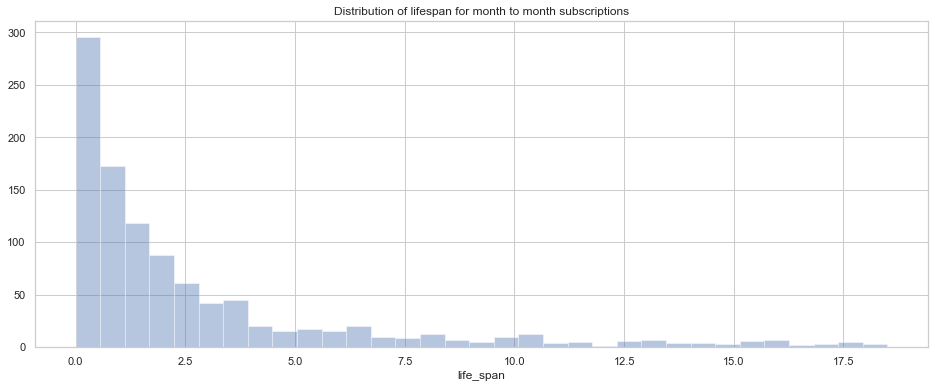

In [289]:
#Some of them actually upgraded to annual plan
plt.figure(figsize=(16, 6))
ax = sns.distplot(lifespan_m2m, kde=False)
ax.set_title("Distribution of lifespan for month to month subscriptions")

plt.show()

In [290]:
#Cancellation is more likely at round 17th which is the renewal date
#People are more likely to subscribe 1 week before the subscription cutoff date probably due to promotions


date_analysis = subscriptions.groupby('cancel_date').size().to_frame(name = 'count').reset_index().iloc[:-1]
date_analysis.rename(columns={'cancel_date':'Date','count':'cancel_date'}, inplace = True)
date_analysis['subscribe_date'] = subscriptions.groupby('subscribe_date').size().to_frame(name = 'count').reset_index()['count']
date_analysis

,Date,cancel_date,subscribe_date
0,1,26,79
1,2,10,44
2,3,14,54
3,4,14,43
4,5,20,73
5,6,26,52
6,7,34,126
7,8,34,27
8,9,31,43
9,10,40,37


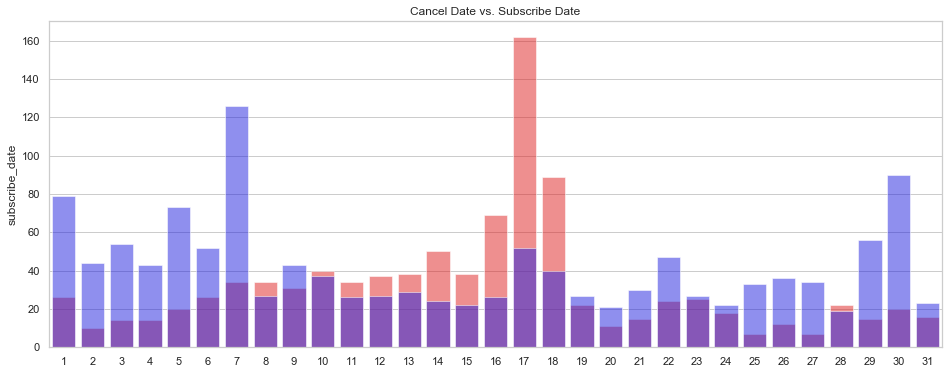

In [291]:
#Add a hist chart
plt.figure(figsize=(16, 6))
ax = sns.barplot(x="Date", y="cancel_date", data=date_analysis, color='red',alpha=0.5,ci=None)
ax = sns.barplot(x="Date", y="subscribe_date", data=date_analysis, color='blue',alpha=0.5,ci=None)

ax.set_title("Cancel Date vs. Subscribe Date")
ax.set_xlabel('')
plt.show()

In [292]:
#People are more likely to cancel at nights
#But subscribe happen at night and in the afternoon: maybe send emails just before they have time to subscribe

hour_analysis = pd.merge(subscriptions.groupby('cancel_hour').size().to_frame(name ='cancel_hour'), subscriptions.groupby('subscribe_hour').size().to_frame(name ='subscribe_hour'), left_index=True, right_index=True, how='outer').reset_index().iloc[:-1].fillna(0)
hour_analysis.rename(columns={'index':'Hour'}, inplace = True)
hour_analysis

,Hour,cancel_hour,subscribe_hour
0,0,52.0,41.0
1,1,21.0,15.0
2,2,10.0,7.0
3,3,2.0,2.0
4,4,0.0,1.0
5,5,5.0,0.0
6,6,13.0,13.0
7,7,17.0,12.0
8,8,38.0,28.0
9,9,56.0,52.0


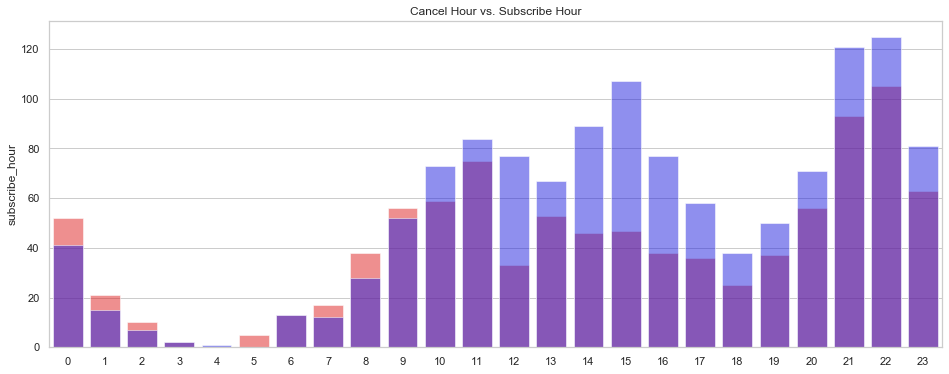

In [293]:
#Add a hist chart
plt.figure(figsize=(16, 6))
ax = sns.barplot(x="Hour", y="cancel_hour", data=hour_analysis, color='red',alpha=0.5,ci=None)
ax = sns.barplot(x="Hour", y="subscribe_hour", data=hour_analysis, color='blue',alpha=0.5,ci=None)

ax.set_title("Cancel Hour vs. Subscribe Hour")
ax.set_xlabel('')
plt.show()

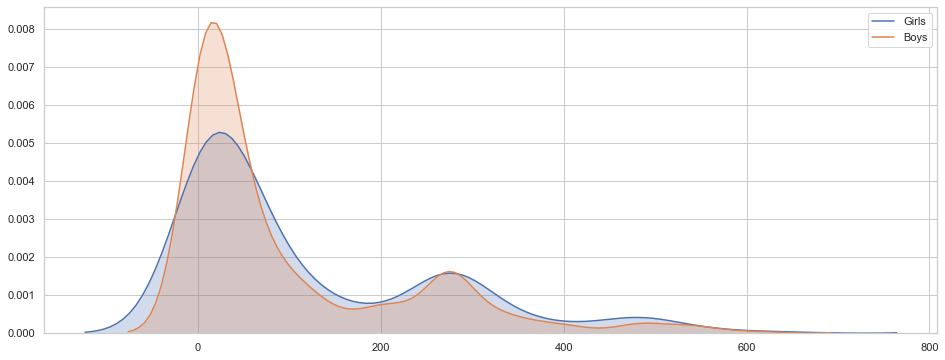

In [294]:
#Hypothesis: girls are earlier to develop language skills and like books than boys and thus more revenues from this group

subscriptions_girls = subscriptions.loc[subscriptions['Child_Gender']=='Girl',:] 
subscriptions_boys = subscriptions.loc[subscriptions['Child_Gender']=='Boy',:] 

plt.figure(figsize=(16, 6))
ax = sns.kdeplot(subscriptions_girls['Total Revenue'], shade = True, label="Girls")
ax = sns.kdeplot(subscriptions_boys['Total Revenue'], shade = True, label="Boys")

plt.legend()
plt.show()

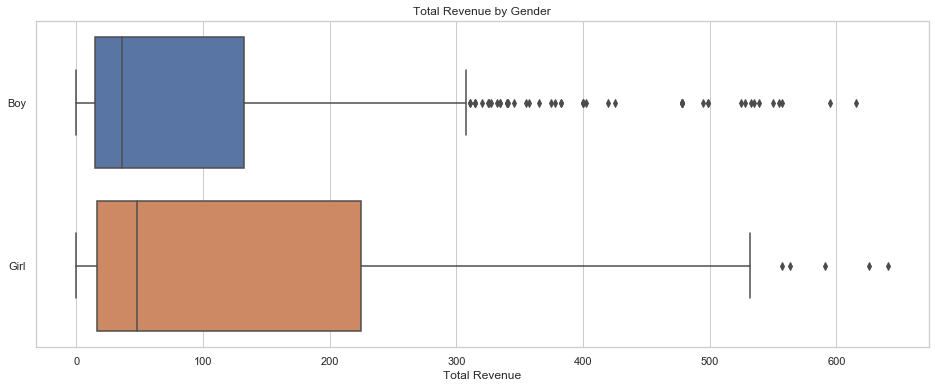

In [295]:
#Revenue by gender
plt.figure(figsize=(16, 6))
ax = sns.boxplot(x="Total Revenue", y="Child_Gender", orient="h", data=subscriptions)
#ax = sns.swarmplot(x="PRICE", y="CITY", orient="h", data=redfin, color="white")
ax.set_title("Total Revenue by Gender")
ax.set_ylabel('')

plt.show()

In [296]:
#mean, median and all percentiles are higher for girls but it also have a higher stdev
subscriptions_girls['Total Revenue'].describe()

count    658.000000
mean     118.550608
std      142.334226
min        0.000000
25%       15.960000
50%       48.075000
75%      224.850000
max      640.660000
Name: Total Revenue, dtype: float64

In [297]:
subscriptions_boys['Total Revenue'].describe()

count    631.000000
mean      97.864976
std      129.928706
min        0.000000
25%       14.985000
50%       35.910000
75%      132.700000
max      615.710000
Name: Total Revenue, dtype: float64

In [298]:
#Run a T Test
#Null: the means are the same for girls and boys
#Null is rejected
#This is assuming holding all other variables constant
#A multivariate regression will be more rigorous in controlling other features

from scipy import stats
#np.random.seed(88)

revenue_girls = subscriptions_girls['Total Revenue']
revenue_boys = subscriptions_boys['Total Revenue']

#t, p = stats.ttest_ind(Q2_PRICE,Q4_PRICE)
t, p = stats.ttest_ind(revenue_girls, revenue_boys, equal_var=False)
print("t = " + str(t))
print("p = " + str(p))

t = 2.7269370302021305
p = 0.006479573413229257


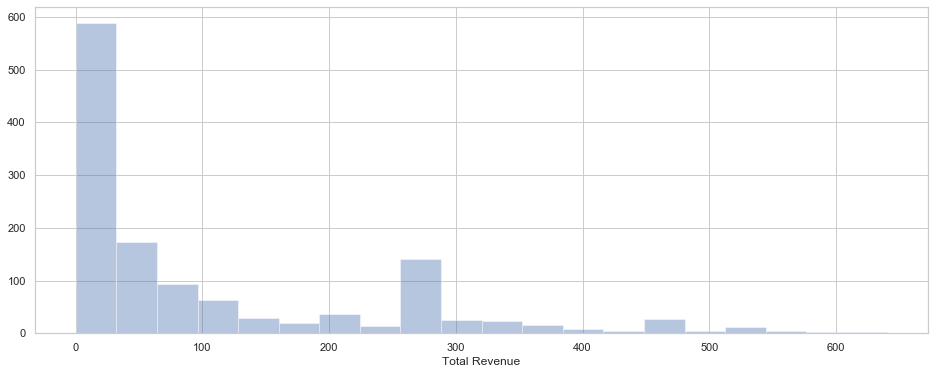

In [299]:
#Plot the distribution of total revenue
#Long tail on the right
#The peak at 275 is the cost of 1 year subscription

plt.figure(figsize=(16, 6))
ax = sns.distplot(subscriptions['Total Revenue'], kde=False)
plt.show()

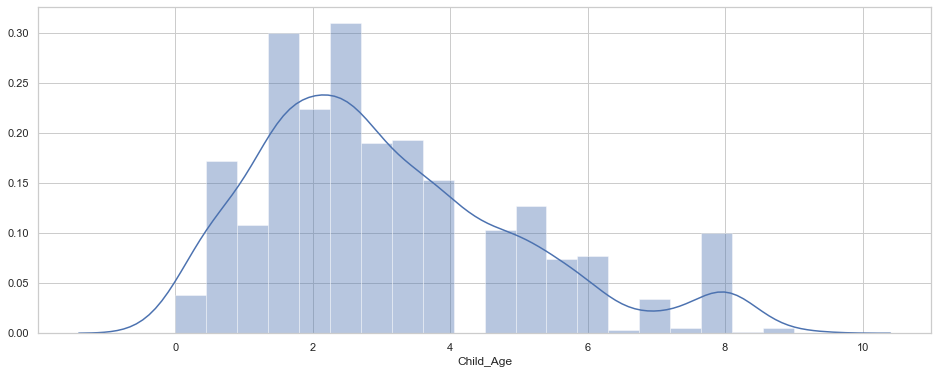

In [300]:
#Plot the distribution of child age
#Long tail on the right
plt.figure(figsize=(16, 6))
ax = sns.distplot(subscriptions['Child_Age'])
plt.show()

In [301]:
subscriptions.head()

,Subscription ID,First Name,Last Name,Email,Status,Total Revenue,Fulfillment Status,Is a Gift,Shipping City,Shipping Zip,Shipping Province,Shipping Country,Initial Order ID,Term,Subscription_Product,Child_Age,Child_Gender,Coupon_Used,Start_Date_dt,End_Date_dt,Cancel_Date_dt,Start_Date_Long,Cancel_Date_Long,canceled_tenure,active_tenure,subscribe_date,subscribe_hour,cancel_date,cancel_hour,american,0-2 box,2-5 box,5+ box,12 Month Prepay,Month to Month,active,cancelled,expired,Not_Used_Coupon,Used_Coupon,Gift,Not_Gift,Boy,Girl,1STPANDA10OFF,DDDHHHZZZ,DIYA,ERXIGUO,GALA,GALTOGETHER10OFF,GALTOGETHER10OFF3M,GT1STFREE,GTFRESH,GTLOVE,GTLUCKY,GTMOM,GTNIAN,GTPANDA3M,GTSPRING,GTXMAS,GXFXXMHZ,HAPPY100DAYS,HEYWOW,HOTPANDA,KKMANDARIN,LIHANPANDA,LIHANSBOOKNEST,LINGOBUS,LOVECX,LUCKYMAMA,LUCKYMOM,LUCKYPANDA,LUCKYU,MDYANG,MESSYCOW,MESSYCOWVIP,MOLO,NIUMAVIP,PANDA09,PANDA10,PANDA127,PANDA1STFREE,PANDA54,PANDABUNNY,PANDACJ,PANDALOVE,PANDAMOM,PANDAMYDEAR,PANDAPICKUP,PANDAREUNION,PANDASHOP10,PANDASPRING,PANDAYAO,PANDAYEAR,RF2GET1FREE,RF3GET1FREE,RF6GET2NDFREE,SHIP50,SPONGELAB,USMAMA,USMAMA1Y,USMAMAVIP,USMAMAZJ,VIPFIRSTFREE,VIPFREEINF,VIPINFLUENCER,WEEE,WEEEVIP,XM,XMBABA,XMJSLH,XMPANDA,XMSEA,XMTTCD,XMVIP,XMXQ,XPANDA,XQDW,XQDWPD,YWZGG,ZYLYZXY,PAYPAL,STRIPE,Num_Coupons_Used,life_span
0,2739202500,Jennifer,Ting,muchenting@hotmail.com,active,275.00,OPEN,Not_Gift,San Ramon,94583,CA,US,2739202463,12 Month Prepay,0-2 box,1.5,Boy,Used_Coupon,2020-02-11 01:30:24,2021-02-17,,2020-02-11 01:30:24-08:00,,NaN,20.0,11,1,,,0,1,0,0,1,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,20.0
1,2733195384,Shen,Qu,aliry111@hotmail.com,active,285.00,OPEN,Not_Gift,Clarksburg,20871,MD,US,2733195305,12 Month Prepay,2-5 box,4.5,Girl,Used_Coupon,2020-02-08 06:30:07,2021-02-17,,2020-02-08 09:30:07-05:00,,NaN,23.0,8,9,,,0,0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,23.0
2,2721329780,Weiyi,Zhen,zhenweiyi@hotmail.com,active,285.00,OPEN,Not_Gift,San Francisco,94112-4264,CA,US,2721329647,12 Month Prepay,0-2 box,2.5,Girl,Not_Used_Coupon,2020-02-02 17:54:50,2021-01-17,,2020-02-02 17:54:50-08:00,,NaN,29.0,2,17,,,0,1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,29.0
3,2715898054,Jingwen,Zhen,zjeanwen@hotmail.com,active,18.72,CLOSED,Not_Gift,Chicago,60616,IL,US,2715897946,Month to Month,2-5 box,2.5,Girl,Used_Coupon,2020-01-31 12:54:01,2020-02-17,,2020-01-31 14:54:01-06:00,,NaN,31.0,31,14,,,0,0,1,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,31.0
4,2707797439,Xiaoqi,Wu,lenkywu@gmail.com,active,285.00,OPEN,Not_Gift,Lockport,14094-5716,NY,US,2707797304,12 Month Prepay,0-2 box,1.5,Girl,Not_Used_Coupon,2020-01-29 04:55:18,2021-01-17,,2020-01-29 07:55:18-05:00,,NaN,33.0,29,7,,,0,1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,33.0


In [334]:
subscriptions.groupby('Status').mean()

,index,Subscription ID,Total Revenue,Initial Order ID,Child_Age,canceled_tenure,active_tenure,subscribe_date,subscribe_hour,american,0-2 box,2-5 box,5+ box,12 Month Prepay,Month to Month,active,cancelled,expired,Not_Used_Coupon,Used_Coupon,Gift,Not_Gift,Boy,Girl,1STPANDA10OFF,DDDHHHZZZ,DIYA,ERXIGUO,GALA,GALTOGETHER10OFF,GALTOGETHER10OFF3M,GT1STFREE,GTFRESH,GTLOVE,GTLUCKY,GTMOM,GTNIAN,GTPANDA3M,GTSPRING,GTXMAS,GXFXXMHZ,HAPPY100DAYS,HEYWOW,HOTPANDA,KKMANDARIN,LIHANPANDA,LIHANSBOOKNEST,LINGOBUS,LOVECX,LUCKYMAMA,LUCKYMOM,LUCKYPANDA,LUCKYU,MDYANG,MESSYCOW,MESSYCOWVIP,MOLO,NIUMAVIP,PANDA09,PANDA10,PANDA127,PANDA1STFREE,PANDA54,PANDABUNNY,PANDACJ,PANDALOVE,PANDAMOM,PANDAMYDEAR,PANDAPICKUP,PANDAREUNION,PANDASHOP10,PANDASPRING,PANDAYAO,PANDAYEAR,RF2GET1FREE,RF3GET1FREE,RF6GET2NDFREE,SHIP50,SPONGELAB,USMAMA,USMAMA1Y,USMAMAVIP,USMAMAZJ,VIPFIRSTFREE,VIPFREEINF,VIPINFLUENCER,WEEE,WEEEVIP,XM,XMBABA,XMJSLH,XMPANDA,XMSEA,XMTTCD,XMVIP,XMXQ,XPANDA,XQDW,XQDWPD,YWZGG,ZYLYZXY,PAYPAL,STRIPE,Num_Coupons_Used,life_span,num_hardcover,num_boardbook,num_3d,num_softcover,num_chapter,num_stickers,num_crafts,num_stationary,cost,num_books,num_others,num_all,num_hardcover_last,num_boardbook_last,num_3d_last,num_softcover_last,num_chapter_last,num_stickers_last,num_crafts_last,num_stationary_last,cost_last,num_books_last,num_others_last,num_all_last
Status,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
active,496.676375,2.195282e+09,281.873883,2.195277e+09,3.037961,NaN,292.569579,15.333333,14.928803,0.061489,0.213592,0.666667,0.119741,0.653722,0.346278,1.0,0.0,0.0,0.514563,0.485437,0.029126,0.970874,0.404531,0.595469,0.012945,0.009709,0.0,0.006472,0.0000,0.0000,0.009709,0.000000,0.000000,0.0000,0.003236,0.0000,0.006472,0.003236,0.000000,0.016181,0.0000,0.0000,0.003236,0.016181,0.000000,0.0000,0.0000,0.000000,0.009709,0.000000,0.003236,0.022654,0.0000,0.003236,0.006472,0.0,0.009709,0.012945,0.042071,0.0000,0.003236,0.003236,0.0000,0.009709,0.003236,0.006472,0.0000,0.003236,0.003236,0.029126,0.003236,0.009709,0.003236,0.003236,0.003236,0.012945,0.0000,0.0000,0.0000,0.058252,0.012945,0.0,0.0000,0.006472,0.0000,0.000000,0.0000,0.003236,0.0000,0.003236,0.003236,0.042071,0.0000,0.0000,0.093851,0.003236,0.012945,0.003236,0.0000,0.003236,0.000000,0.268608,0.724919,0.540453,292.569579,2.321740,0.275056,0.473020,0.273685,0.004388,0.444627,0.658387,0.500384,60.902362,3.347889,1.603398,4.951287,2.359223,0.000000,0.854369,0.666667,0.000000,0.000000,0.213592,0.000000,64.195146,3.880259,0.213592,4.093851
cancelled,727.334433,2.006552e+09,55.050242,2.006552e+09,3.101848,77.854785,NaN,14.272827,15.381738,0.052805,0.358636,0.498350,0.143014,0.048405,0.951595,0.0,1.0,0.0,0.135314,0.864686,0.003300,0.996700,0.514851,0.485149,0.008801,0.008801,0.0,0.011001,0.0011,0.0022,0.006601,0.012101,0.002200,0.0033,0.005501,0.0033,0.000000,0.000000,0.003300,0.015402,0.0011,0.0011,0.002200,0.145215,0.002200,0.0022,0.0011,0.006601,0.004400,0.009901,0.001100,0.211221,0.0044,0.000000,0.002200,0.0,0.002200,0.000000,0.096810,0.0022,0.015402,0.002200,0.0011,0.008801,0.012101,0.004400,0.0022,0.000000,0.011001,0.513751,0.000000,0.004400,0.003300,0.000000,0.000000,0.019802,0.0011,0.0044,0.0011,0.029703,0.000000,0.0,0.0044,0.019802,0.0011,0.000000,0.0022,0.000000,0.0011,0.003300,0.001100,0.016502,0.0011,0.0033,0.005501,0.001100,0.015402,0.003300,0.0044,0.001100,0.004400,0.270627,0.608361,1.303630,77.854785,2.315183,0.161885,0.288632,0.118060,0.042485,1.013185,1.451132,0.114283,57.918053,2.926245,2.578600,5.504845,2.343750,0.186821,0.283967,0.139946,0.029891,0.894022,1.404891,0.201087,58.133057,2.984375,2.500000,5.484375
expired,723.464789,1.988956e+09,36.892958,1.988956e+09,3.315915,65.464789,NaN,13.915493,14.422535,0.014085,0.352113,0.507042,0.140845,0.056338,0.943662,0.0,0.0,1.0,0.183099,0.816901,0.760563,0.239437,0.535211,0.464789,0.028169,0.000000,0.0,0.000000,0.0000,0.0000,0.000000,0.014085,0.014085,0.0000,0.000000,0

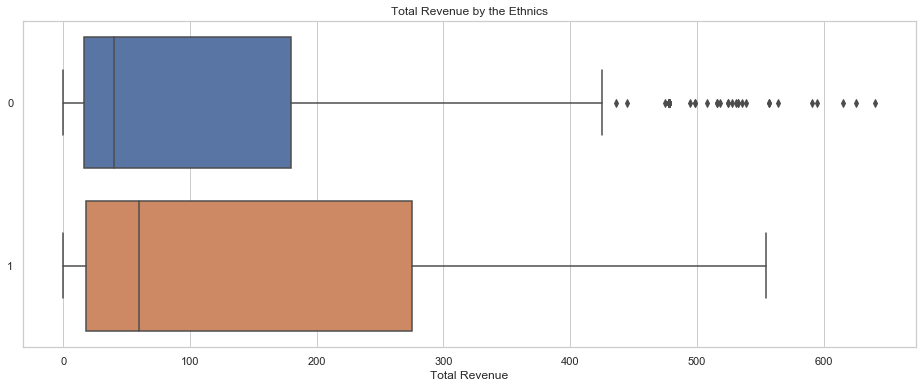

In [302]:
#American families tend to spend more
plt.figure(figsize=(16, 6))
ax = sns.boxplot(x="Total Revenue", y="american", orient="h", data=subscriptions)
#ax = sns.swarmplot(x="PRICE", y="CITY", orient="h", data=redfin, color="white")
ax.set_title("Total Revenue by the Ethnics")
ax.set_ylabel('')

plt.show()

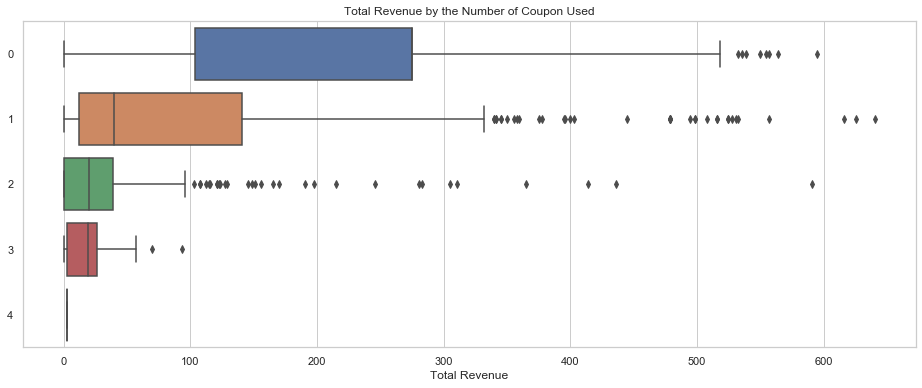

In [303]:
#Revenue by coupon used
#WOW, this is interesting! More coupons used -> less revenue from the customers (obviously but not so obvoiusly)
plt.figure(figsize=(16, 6))
ax = sns.boxplot(x="Total Revenue", y="Num_Coupons_Used", orient="h", data=subscriptions)
#ax = sns.swarmplot(x="PRICE", y="CITY", orient="h", data=redfin, color="white")
ax.set_title("Total Revenue by the Number of Coupon Used")
ax.set_ylabel('')

plt.show()

In [304]:
subscriptions.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1289 entries, 0 to 1342
Data columns (total 125 columns):
Subscription ID         1289 non-null int64
First Name              1289 non-null object
Last Name               1282 non-null object
Email                   1289 non-null object
Status                  1289 non-null object
Total Revenue           1289 non-null float64
Fulfillment Status      1289 non-null object
Is a Gift               1289 non-null object
Shipping City           1289 non-null object
Shipping Zip            1289 non-null object
Shipping Province       1289 non-null object
Shipping Country        1289 non-null object
Initial Order ID        1289 non-null int64
Term                    1289 non-null object
Subscription_Product    1289 non-null object
Child_Age               1289 non-null float64
Child_Gender            1289 non-null object
Coupon_Used             1289 non-null object
Start_Date_dt           1289 non-null datetime64[ns]
End_Date_dt             1289 

In [305]:
subscriptions.describe()

,Subscription ID,Total Revenue,Initial Order ID,Child_Age,canceled_tenure,active_tenure,subscribe_date,subscribe_hour,american,0-2 box,2-5 box,5+ box,12 Month Prepay,Month to Month,active,cancelled,expired,Not_Used_Coupon,Used_Coupon,Gift,Not_Gift,Boy,Girl,1STPANDA10OFF,DDDHHHZZZ,DIYA,ERXIGUO,GALA,GALTOGETHER10OFF,GALTOGETHER10OFF3M,GT1STFREE,GTFRESH,GTLOVE,GTLUCKY,GTMOM,GTNIAN,GTPANDA3M,GTSPRING,GTXMAS,GXFXXMHZ,HAPPY100DAYS,HEYWOW,HOTPANDA,KKMANDARIN,LIHANPANDA,LIHANSBOOKNEST,LINGOBUS,LOVECX,LUCKYMAMA,LUCKYMOM,LUCKYPANDA,LUCKYU,MDYANG,MESSYCOW,MESSYCOWVIP,MOLO,NIUMAVIP,PANDA09,PANDA10,PANDA127,PANDA1STFREE,PANDA54,PANDABUNNY,PANDACJ,PANDALOVE,PANDAMOM,PANDAMYDEAR,PANDAPICKUP,PANDAREUNION,PANDASHOP10,PANDASPRING,PANDAYAO,PANDAYEAR,RF2GET1FREE,RF3GET1FREE,RF6GET2NDFREE,SHIP50,SPONGELAB,USMAMA,USMAMA1Y,USMAMAVIP,USMAMAZJ,VIPFIRSTFREE,VIPFREEINF,VIPINFLUENCER,WEEE,WEEEVIP,XM,XMBABA,XMJSLH,XMPANDA,XMSEA,XMTTCD,XMVIP,XMXQ,XPANDA,XQDW,XQDWPD,YWZGG,ZYLYZXY,PAYPAL,STRIPE,Num_Coupons_Used,life_span
count,1.289000e+03,1289.000000,1.289000e+03,1289.000000,980.000000,309.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.0,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.0,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.0,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.00000
mean,2.050825e+09,108.424438,2.050824e+09,3.098324,76.957143,292.569579,14.507370,15.220326,0.052754,0.323507,0.539178,0.137316,0.193949,0.806051,0.239721,0.705198,0.055081,0.228860,0.771140,0.051202,0.948798,0.489527,0.510473,0.010861,0.008534,0.0,0.009310,0.000776,0.001552,0.006982,0.009310,0.002327,0.002327,0.004655,0.002327,0.001552,0.000776,0.003103,0.016292,0.000776,0.000776,0.002327,0.107060,0.002327,0.001552,0.000776,0.005431,0.005431,0.006982,0.001552,0.169899,0.003103,0.000776,0.003103,0.0,0.003879,0.003103,0.080683,0.001552,0.012413,0.003103,0.000776,0.008534,0.013964,0.004655,0.001552,0.000776,0.008534,0.405741,0.000776,0.005431,0.003103,0.000776,0.000776,0.017067,0.000776,0.003103,0.000776,0.036462,0.003103,0.0,0.003103,0.015516,0.000776,0.000776,0.001552,0.000776,0.000776,0.003103,0.001552,0.024050,0.000776,0.002327,0.026377,0.001552,0.014740,0.003103,0.003103,0.001552,0.003879,0.265322,0.646237,1.123351,128.64391
std,2.703128e+08,136.741522,2.703110e+08,1.927760,98.467886,167.173075,9.695607,5.701519,0.223629,0.467996,0.498656,0.344314,0.395543,0.395543,0.427079,0.456131,0.228228,0.420262,0.420262,0.220496,0.220496,0.500084,0.500084,0.103689,0.092019,0.0,0.096073,0.027853,0.039375,0.083299,0.096073,0.048206,0.048206,0.068093,0.048206,0.039375,0.027853,0.055641,0.126644,0.027853,0.027853,0.048206,0.309309,0.048206,0.039375,0.027853,0.073521,0.073521,0.083299,0.039375,0.375690,0.055641,0.027853,0.055641,0.0,0.062185,0.055641,0.272453,0.039375,0.110762,0.055641,0.027853,0.092019,0.117388,0.068093,0.039375,0.027853,0.092019,0.491225,0.027853,0.073521,0.055641,0.027853,0.027853,0.129573,0.027853,0.055641,0.027853,0.187510,0.055641,0.0,0.055641,0.123641,0.027853,0.027853,0.039375,0.027853,0.027853,0.055641,0.039375,0.1

In [306]:
#Group by subscription status
#some expired are due to CC expired (a nice way to cancel :()
subscriptions.groupby('Status').size()

Status
active       309
cancelled    909
expired       71
dtype: int64

In [308]:

#lengh of subscription AND revenue total
#Someone who is canceled but subscribed for a long time vs. someone who just subscribed 1 month

In [309]:
#Cancellation Data
cancellations = pd.read_csv(data_path + "Subscription/cancellations.csv", encoding="utf8")
cancellations.head(2)

,id,customer_id,first_name,last_name,name,email,phone_number,log_type,product_names,product_ids,subscription_id,subscription_term,subscription_start_date,cancel_reason,note,log_time,ship_to,ship_street,ship_unit,ship_city,ship_state,ship_zip_code,ship_country,location,country,months_subscribed
0,2739933823,1938363638,Yuehua,Fang,Yuehua Fang,personalfang@gmail.com,NaN,cancelled,"2-5岁熊猫盒子, 2-5岁熊猫盒子, 2-5岁熊猫盒子","2010794217, 2010794217, 2010794217",2566554451,Month to Month,2019-11-27T07:12:33Z,did_not_like_product,Do not like the March box,2020-02-11T11:35:23Z,Yuehua Fang,3146 Golfview Dr.,NaN,Saline,MI,48176,US,"MI, US",US,3
1,2738849995,2411096922,Yue,Zhao,Yue Zhao,hellozhaoyue@gmail.com,NaN,cancelled,"0-2岁熊猫盒子, 0-2岁熊猫盒子","2005236928, 2005236928",2411097273,12 Month Prepay,2019-09-15T22:30:17Z,resubscribe_later,Allow change age range within yearly subscript...,2020-02-10T23:27:30Z,Yue Zhao,2133 cook drive,NaN,Easton,PA,18045,US,"PA, US",US,5


In [310]:
cancel_reason_count = cancellations.groupby('cancel_reason').size().sort_values(ascending=False)

cancel_reason_count/cancel_reason_count.sum()

cancel_reason
resubscribe_later       0.292233
test_it_out             0.182524
other                   0.180583
did_not_like_product    0.071845
gift                    0.061165
prevent_renewal         0.046602
not_worth_price         0.041748
accidental_order        0.039806
trying_other_service    0.033010
merchant_cancelled      0.021359
other_service_issue     0.015534
shipping_issues         0.011650
fraud                   0.000971
billed_twice            0.000971
dtype: float64

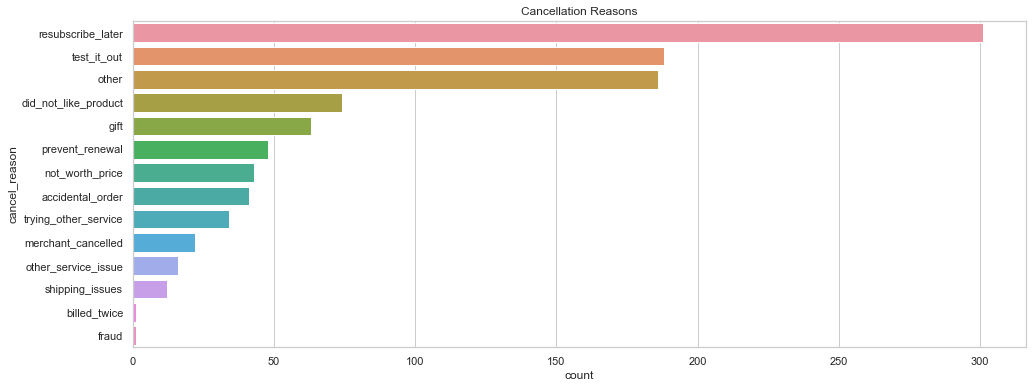

In [311]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 6))
ax = sns.countplot(y="cancel_reason", data=cancellations, order = cancellations['cancel_reason'].value_counts().index)
ax.set_title("Cancellation Reasons")
plt.show()

In [312]:
#Cancellation reason notes
#potentially can do some NLP analysis

In [313]:
cancellations.shape

(1101, 26)

In [314]:
#box content data
box = pd.read_csv(data_path + "Subscription/box.csv", encoding="utf8")
box = box.fillna(0)
box['Day'] = 15

In [315]:
box['num_books'] = box['num_hardcover'] + box['num_boardbook'] +  box['num_3d'] +  box['num_softcover'] +  box['num_chapter']
box['num_others'] = box['num_stickers'] + box['num_crafts'] +  box['num_stationary']
box['num_all'] = box['num_books'] + box['num_others']

box['Time']= pd.to_datetime(box[['Year','Month','Day']])
box = box.drop(columns=['Day'])
box.head()

,Year,Month,Age,Theme,num_hardcover,num_boardbook,num_3d,num_softcover,num_chapter,num_stickers,num_crafts,num_stationary,cost,num_books,num_others,num_all,Time
0,2018,9,0-2 box,Moon,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,46.00,2.0,1.0,3.0,2018-09-15
1,2018,9,2-5 box,Moon,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,49.00,2.0,1.0,3.0,2018-09-15
2,2018,9,5+ box,Moon,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,52.50,2.0,1.0,3.0,2018-09-15
3,2018,10,0-2 box,Halloween,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,67.20,2.0,3.0,5.0,2018-10-15
4,2018,10,2-5 box,Halloween,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,65.83,2.0,2.0,4.0,2018-10-15


In [316]:
box.tail()

,Year,Month,Age,Theme,num_hardcover,num_boardbook,num_3d,num_softcover,num_chapter,num_stickers,num_crafts,num_stationary,cost,num_books,num_others,num_all,Time
49,2020,1,2-5 box,Mouse,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,55.30,3.0,2.0,5.0,2020-01-15
50,2020,1,5+ box,Mouse,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,71.76,3.0,2.0,5.0,2020-01-15
51,2020,2,0-2 box,Health,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,64.50,4.0,1.0,5.0,2020-02-15
52,2020,2,2-5 box,Health,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,65.30,4.0,0.0,4.0,2020-02-15
53,2020,2,5+ box,Health,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.50,3.0,0.0,3.0,2020-02-15


In [317]:
#Combine end date and cancel date into one column
subscriptions['end_date_all'] = subscriptions['End_Date_dt']
subscriptions.loc[subscriptions['Cancel_Date_dt']!='','end_date_all'] = subscriptions.loc[subscriptions['Cancel_Date_dt']!='','Cancel_Date_dt']
subscriptions = subscriptions.reset_index()

new_cols = ['num_hardcover','num_boardbook','num_3d','num_softcover','num_chapter','num_stickers','num_crafts','num_stationary',
               'cost','num_books','num_others','num_all']

new_cols_latest = [s + '_last' for s in new_cols]

for col in new_cols:
    subscriptions[col] = 0

for col in new_cols_latest:
    subscriptions[col] = 0
    

In [318]:
subscriptions.head(2)

,index,Subscription ID,First Name,Last Name,Email,Status,Total Revenue,Fulfillment Status,Is a Gift,Shipping City,Shipping Zip,Shipping Province,Shipping Country,Initial Order ID,Term,Subscription_Product,Child_Age,Child_Gender,Coupon_Used,Start_Date_dt,End_Date_dt,Cancel_Date_dt,Start_Date_Long,Cancel_Date_Long,canceled_tenure,active_tenure,subscribe_date,subscribe_hour,cancel_date,cancel_hour,american,0-2 box,2-5 box,5+ box,12 Month Prepay,Month to Month,active,cancelled,expired,Not_Used_Coupon,Used_Coupon,Gift,Not_Gift,Boy,Girl,1STPANDA10OFF,DDDHHHZZZ,DIYA,ERXIGUO,GALA,GALTOGETHER10OFF,GALTOGETHER10OFF3M,GT1STFREE,GTFRESH,GTLOVE,GTLUCKY,GTMOM,GTNIAN,GTPANDA3M,GTSPRING,GTXMAS,GXFXXMHZ,HAPPY100DAYS,HEYWOW,HOTPANDA,KKMANDARIN,LIHANPANDA,LIHANSBOOKNEST,LINGOBUS,LOVECX,LUCKYMAMA,LUCKYMOM,LUCKYPANDA,LUCKYU,MDYANG,MESSYCOW,MESSYCOWVIP,MOLO,NIUMAVIP,PANDA09,PANDA10,PANDA127,PANDA1STFREE,PANDA54,PANDABUNNY,PANDACJ,PANDALOVE,PANDAMOM,PANDAMYDEAR,PANDAPICKUP,PANDAREUNION,PANDASHOP10,PANDASPRING,PANDAYAO,PANDAYEAR,RF2GET1FREE,RF3GET1FREE,RF6GET2NDFREE,SHIP50,SPONGELAB,USMAMA,USMAMA1Y,USMAMAVIP,USMAMAZJ,VIPFIRSTFREE,VIPFREEINF,VIPINFLUENCER,WEEE,WEEEVIP,XM,XMBABA,XMJSLH,XMPANDA,XMSEA,XMTTCD,XMVIP,XMXQ,XPANDA,XQDW,XQDWPD,YWZGG,ZYLYZXY,PAYPAL,STRIPE,Num_Coupons_Used,life_span,end_date_all,num_hardcover,num_boardbook,num_3d,num_softcover,num_chapter,num_stickers,num_crafts,num_stationary,cost,num_books,num_others,num_all,num_hardcover_last,num_boardbook_last,num_3d_last,num_softcover_last,num_chapter_last,num_stickers_last,num_crafts_last,num_stationary_last,cost_last,num_books_last,num_others_last,num_all_last
0,0,2739202500,Jennifer,Ting,muchenting@hotmail.com,active,275.0,OPEN,Not_Gift,San Ramon,94583,CA,US,2739202463,12 Month Prepay,0-2 box,1.5,Boy,Used_Coupon,2020-02-11 01:30:24,2021-02-17,,2020-02-11 01:30:24-08:00,,NaN,20.0,11,1,,,0,1,0,0,1,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,20.0,2021-02-17 00:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,2733195384,Shen,Qu,aliry111@hotmail.com,active,285.0,OPEN,Not_Gift,Clarksburg,20871,MD,US,2733195305,12 Month Prepay,2-5 box,4.5,Girl,Used_Coupon,2020-02-08 06:30:07,2021-02-17,,2020-02-08 09:30:07-05:00,,NaN,23.0,8,9,,,0,0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,23.0,2021-02-17 00:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [331]:
#Loop over each row and calculate the average costs/number of items across all boxes and the last box they received

for index, row in subscriptions.iterrows():
    
    start_date = row['Start_Date_dt']
    end_date = row['end_date_all']
    age_group = row['Subscription_Product']

    box_received = box.loc[(box['Age']==age_group) & (box['Time']<=end_date) & (box['Time']>=start_date),
           'num_hardcover':'num_all']
    avg_box = box_received.mean(axis=0)
    subscriptions.loc[index, new_cols] = avg_box

    last_box = box_received.iloc[-1:,].mean(axis=0)
    last_box.index= new_cols_latest
    subscriptions.loc[index, new_cols_latest] = last_box

In [332]:
#If NAs for the box info, it suggest their cancel date is not long after subscribe date
#And generally suggests they cancels before receiving the box
#Maybe they just don't want to auto-renewed 

subscriptions

,index,Subscription ID,First Name,Last Name,Email,Status,Total Revenue,Fulfillment Status,Is a Gift,Shipping City,Shipping Zip,Shipping Province,Shipping Country,Initial Order ID,Term,Subscription_Product,Child_Age,Child_Gender,Coupon_Used,Start_Date_dt,End_Date_dt,Cancel_Date_dt,Start_Date_Long,Cancel_Date_Long,canceled_tenure,active_tenure,subscribe_date,subscribe_hour,cancel_date,cancel_hour,american,0-2 box,2-5 box,5+ box,12 Month Prepay,Month to Month,active,cancelled,expired,Not_Used_Coupon,Used_Coupon,Gift,Not_Gift,Boy,Girl,1STPANDA10OFF,DDDHHHZZZ,DIYA,ERXIGUO,GALA,GALTOGETHER10OFF,GALTOGETHER10OFF3M,GT1STFREE,GTFRESH,GTLOVE,GTLUCKY,GTMOM,GTNIAN,GTPANDA3M,GTSPRING,GTXMAS,GXFXXMHZ,HAPPY100DAYS,HEYWOW,HOTPANDA,KKMANDARIN,LIHANPANDA,LIHANSBOOKNEST,LINGOBUS,LOVECX,LUCKYMAMA,LUCKYMOM,LUCKYPANDA,LUCKYU,MDYANG,MESSYCOW,MESSYCOWVIP,MOLO,NIUMAVIP,PANDA09,PANDA10,PANDA127,PANDA1STFREE,PANDA54,PANDABUNNY,PANDACJ,PANDALOVE,PANDAMOM,PANDAMYDEAR,PANDAPICKUP,PANDAREUNION,PANDASHOP10,PANDASPRING,PANDAYAO,PANDAYEAR,RF2GET1FREE,RF3GET1FREE,RF6GET2NDFREE,SHIP50,SPONGELAB,USMAMA,USMAMA1Y,USMAMAVIP,USMAMAZJ,VIPFIRSTFREE,VIPFREEINF,VIPINFLUENCER,WEEE,WEEEVIP,XM,XMBABA,XMJSLH,XMPANDA,XMSEA,XMTTCD,XMVIP,XMXQ,XPANDA,XQDW,XQDWPD,YWZGG,ZYLYZXY,PAYPAL,STRIPE,Num_Coupons_Used,life_span,end_date_all,num_hardcover,num_boardbook,num_3d,num_softcover,num_chapter,num_stickers,num_crafts,num_stationary,cost,num_books,num_others,num_all,num_hardcover_last,num_boardbook_last,num_3d_last,num_softcover_last,num_chapter_last,num_stickers_last,num_crafts_last,num_stationary_last,cost_last,num_books_last,num_others_last,num_all_last
0,0,2739202500,Jennifer,Ting,muchenting@hotmail.com,active,275.00,OPEN,Not_Gift,San Ramon,94583,CA,US,2739202463,12 Month Prepay,0-2 box,1.50,Boy,Used_Coupon,2020-02-11 01:30:24,2021-02-17,,2020-02-11 01:30:24-08:00,,NaN,20.0,11,1,,,0,1,0,0,1,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,20.0,2021-02-17 00:00:00,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,1.000000,0.000000,64.500000,4.000000,1.000000,5.000000,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,64.50,4.0,1.0,5.0
1,1,2733195384,Shen,Qu,aliry111@hotmail.com,active,285.00,OPEN,Not_Gift,Clarksburg,20871,MD,US,2733195305,12 Month Prepay,2-5 box,4.50,Girl,Used_Coupon,2020-02-08 06:30:07,2021-02-17,,2020-02-08 09:30:07-05:00,,NaN,23.0,8,9,,,0,0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,23.0,2021-02-17 00:00:00,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,65.300000,4.000000,0.000000,4.000000,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,65.30,4.0,0.0,4.0
2,2,2721329780,Weiyi,Zhen,zhenweiyi@hotmail.com,active,285.00,OPEN,Not_Gift,San Francisco,94112-4264,CA,US,2721329647,12 Month Prepay,0-2 box,2.50,Girl,Not_Used_Coupon,2020-02-02 17:54:50,2021-01-17,,2020-02-02 17:54:50-08:00,,NaN,29.0,2,17,,,0,1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,29.0,2021-01-17 00:00:00,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,1.000000,0.000000,64.500000,4.000000,1.000000,5.000000,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,64.50,4.0,1.0,5.0
3,3,2715898054,Jingwen,Zhen,zjeanwen@hotmail.com,active,18.72,CLOSED,Not_Gift,Chicago,60616,IL,US,2715897946,Month to Month,2-5 box,2.50,Girl,Used_Coupon,2020-01-31 12:54:01,2020-02-17,,2020-01-31 14:54:01-06:00,,NaN,31.0,31,14,,,0,0,1,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,31.0,2020-02-17 00:00:00,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,65.300000,4.000000,0.000000,4.000

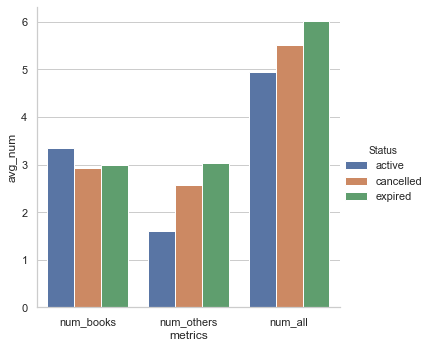

In [353]:
#Intersting, on average, if there're less books in the lifepsan of the client's subscription, they're more liketly to cancel
#However, more other stuff dosn't help

avg_box_by_status = subscriptions.groupby('Status').mean()[['num_books','num_others','num_all']].reset_index()
avg_box_by_status = pd.melt(avg_box_by_status, id_vars="Status", var_name="metrics", value_name="avg_num")

sns.factorplot(x='metrics', y='avg_num', hue='Status', data=avg_box_by_status, kind='bar')

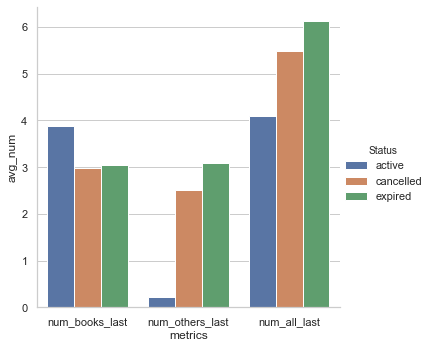

In [356]:
#Intersting, on average, if there're less books in the most recent box, they're more liketly to cancel

last_box_by_status = subscriptions.groupby('Status').mean()[['num_books_last','num_others_last','num_all_last']].reset_index()
last_box_by_status = pd.melt(last_box_by_status, id_vars="Status", var_name="metrics", value_name="avg_num")

sns.factorplot(x='metrics', y='avg_num', hue='Status', data=last_box_by_status, kind='bar')

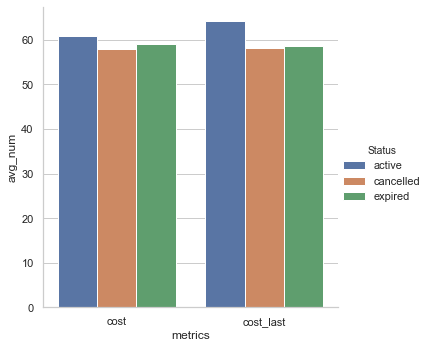

In [357]:
#Lower costs also might lead to cancellations but need to control for other variables to draw conclusions

cost_by_status = subscriptions.groupby('Status').mean()[['cost','cost_last']].reset_index()
cost_by_status = pd.melt(cost_by_status, id_vars="Status", var_name="metrics", value_name="avg_num")

sns.factorplot(x='metrics', y='avg_num', hue='Status', data=cost_by_status, kind='bar')

In [321]:
#Feedback detail data
feedback_detail = pd.read_csv(data_path + "Subscription/feedback_detail.csv", encoding="utf8")
feedback_detail.head(2)

,Customer ID,Shipped On,Customer Name,Customer Email,Customer Since,Rating,Response,Subscription Status,Shipment ID,Tracking No
0,2570660648,01/10/2020,Bailey Bennetzen,lilianpc84@hotmail.com,11/28/2019,3,NaN,active,2632690902,9449009205568568537870
1,1814507977,01/10/2020,Cuiyan Mei,eddymei_1985@sina.com,10/22/2018,5,"From my first box till now, it has been over 1...",active,2545832418,9449009205568568538242


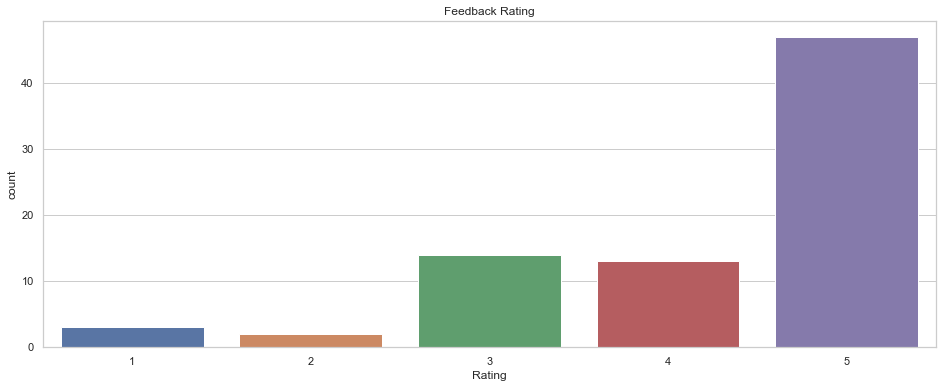

In [358]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 6))
ax = sns.countplot(x="Rating", data=feedback_detail)
ax.set_title("Feedback Rating")
plt.show()

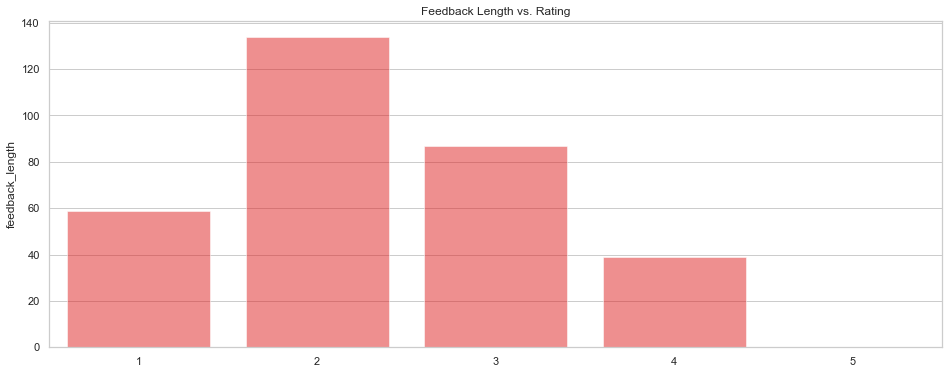

In [367]:
#Interstingly, the longest comments are with rating 2 and 3
#If it's awesome, they usually just leave a 5 star
#If it's really bad, they don't want to waste their time

feedback_detail['feedback_length'] = feedback_detail['Response'].str.len().fillna(0)
feedback_len_analysis = feedback_detail.groupby('Rating').median().reset_index()

plt.figure(figsize=(16, 6))
ax = sns.barplot(x="Rating", y="feedback_length", data=feedback_len_analysis, color='red',alpha=0.5,ci=None)

ax.set_title("Feedback Length vs. Rating")
ax.set_xlabel('')
plt.show()

In [322]:
feedback_detail.shape

(79, 10)

In [368]:
#Merge the rating and feedback length data to subscriptions
subscriptions = pd.merge(subscriptions, feedback_detail[['Customer Email','Rating','feedback_length']], left_on = 'Email', right_on='Customer Email', how='left')
subscriptions.head()

,index,Subscription ID,First Name,Last Name,Email,Status,Total Revenue,Fulfillment Status,Is a Gift,Shipping City,Shipping Zip,Shipping Province,Shipping Country,Initial Order ID,Term,Subscription_Product,Child_Age,Child_Gender,Coupon_Used,Start_Date_dt,End_Date_dt,Cancel_Date_dt,Start_Date_Long,Cancel_Date_Long,canceled_tenure,active_tenure,subscribe_date,subscribe_hour,cancel_date,cancel_hour,american,0-2 box,2-5 box,5+ box,12 Month Prepay,Month to Month,active,cancelled,expired,Not_Used_Coupon,Used_Coupon,Gift,Not_Gift,Boy,Girl,1STPANDA10OFF,DDDHHHZZZ,DIYA,ERXIGUO,GALA,GALTOGETHER10OFF,GALTOGETHER10OFF3M,GT1STFREE,GTFRESH,GTLOVE,GTLUCKY,GTMOM,GTNIAN,GTPANDA3M,GTSPRING,GTXMAS,GXFXXMHZ,HAPPY100DAYS,HEYWOW,HOTPANDA,KKMANDARIN,LIHANPANDA,LIHANSBOOKNEST,LINGOBUS,LOVECX,LUCKYMAMA,LUCKYMOM,LUCKYPANDA,LUCKYU,MDYANG,MESSYCOW,MESSYCOWVIP,MOLO,NIUMAVIP,PANDA09,PANDA10,PANDA127,PANDA1STFREE,PANDA54,PANDABUNNY,PANDACJ,PANDALOVE,PANDAMOM,PANDAMYDEAR,PANDAPICKUP,PANDAREUNION,PANDASHOP10,PANDASPRING,PANDAYAO,PANDAYEAR,RF2GET1FREE,RF3GET1FREE,RF6GET2NDFREE,SHIP50,SPONGELAB,USMAMA,USMAMA1Y,USMAMAVIP,USMAMAZJ,VIPFIRSTFREE,VIPFREEINF,VIPINFLUENCER,WEEE,WEEEVIP,XM,XMBABA,XMJSLH,XMPANDA,XMSEA,XMTTCD,XMVIP,XMXQ,XPANDA,XQDW,XQDWPD,YWZGG,ZYLYZXY,PAYPAL,STRIPE,Num_Coupons_Used,life_span,end_date_all,num_hardcover,num_boardbook,num_3d,num_softcover,num_chapter,num_stickers,num_crafts,num_stationary,cost,num_books,num_others,num_all,num_hardcover_last,num_boardbook_last,num_3d_last,num_softcover_last,num_chapter_last,num_stickers_last,num_crafts_last,num_stationary_last,cost_last,num_books_last,num_others_last,num_all_last,Customer Email,Rating,feedback_length
0,0,2739202500,Jennifer,Ting,muchenting@hotmail.com,active,275.00,OPEN,Not_Gift,San Ramon,94583,CA,US,2739202463,12 Month Prepay,0-2 box,1.5,Boy,Used_Coupon,2020-02-11 01:30:24,2021-02-17,,2020-02-11 01:30:24-08:00,,NaN,20.0,11,1,,,0,1,0,0,1,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,20.0,2021-02-17 00:00:00,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,64.5,4.0,1.0,5.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,64.5,4.0,1.0,5.0,NaN,NaN,NaN
1,1,2733195384,Shen,Qu,aliry111@hotmail.com,active,285.00,OPEN,Not_Gift,Clarksburg,20871,MD,US,2733195305,12 Month Prepay,2-5 box,4.5,Girl,Used_Coupon,2020-02-08 06:30:07,2021-02-17,,2020-02-08 09:30:07-05:00,,NaN,23.0,8,9,,,0,0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,23.0,2021-02-17 00:00:00,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,65.3,4.0,0.0,4.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,65.3,4.0,0.0,4.0,NaN,NaN,NaN
2,2,2721329780,Weiyi,Zhen,zhenweiyi@hotmail.com,active,285.00,OPEN,Not_Gift,San Francisco,94112-4264,CA,US,2721329647,12 Month Prepay,0-2 box,2.5,Girl,Not_Used_Coupon,2020-02-02 17:54:50,2021-01-17,,2020-02-02 17:54:50-08:00,,NaN,29.0,2,17,,,0,1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,29.0,2021-01-17 00:00:00,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,64.5,4.0,1.0,5.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,64.5,4.0,1.0,5.0,NaN,NaN,NaN
3,3,2715898054,Jingwen,Zhen,zjeanwen@hotmail.com,active,18.72,CLOSED,Not_Gift,Chicago,60616,IL,US,2715897946,Month to Month,2-5 box,2.5,Girl,Used_Coupon,2020-01-31 12:54:01,2020-02-17,,2020-01-31 14:54:01-06:00,,NaN,31.0,31,14,,,0,0,1,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,31.0,2020-02-17 00:00:00,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,65.3,4.0,0.0,4.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,65.3,4.0,0.0,4.0,NaN,NaN,NaN
4,4,2707797439,Xiaoqi,Wu,lenkywu@gmail.com,active,285.00,OPEN,Not_Gift,Lockport,14094-5716,NY,US,2707797304,

In [323]:
#One-time Order Data
onetime_order = pd.read_csv(data_path + "Subscription/onetimeorder.csv", encoding="utf8")
onetime_order.head(2)

,Order ID,First Name,Last Name,Email,Order Status,Financial Status,Fulfillment Status,Note,Placed At (Date) UTC,Placed At (Time) UTC,Subtotal,Total Tax,Total Shipping,Total Price,Total Refunded,Test Order,Source,Billing To,Billing Address 1,Billing Address 2,Billing Company,Billing City,Billing Zip,Billing State,Billing Country,Billing Phone,Recipient First Name,Recipient Last Name,Shipping Address 1,Shipping Address 2,Shipping Company,Shipping City,Shipping Zip,Shipping State,Shipping Country,Shipping Phone,Address Verified,Fraud Risk,Is Gift,Gift Message,Coupon 1 Name,Coupon 1 Code,Coupon 1 Discount,Coupon 2 Name,Coupon 2 Code,Coupon 2 Discount,Applied Gift Card 1 Number,Applied Gift Card 1 Amount,Subscription Product 1,Subscription Product 1 Subscription ID,Subscription Product 2,Subscription Product 2 Subscription ID,Subscription Product 3,Subscription Product 3 Subscription ID,One Time Product 1,One Time Product 1 ID,One Time Product 1 Variant 1,One Time Product 2,One Time Product 2 ID,One Time Product 2 Variant 1,One Time Product 3,One Time Product 3 ID,One Time Product 3 Variant 1,One Time Product 4,One Time Product 4 ID,One Time Product 4 Variant 1,One Time Product 5,One Time Product 5 ID,One Time Product 5 Variant 1,One Time Product 6,One Time Product 6 ID,One Time Product 6 Variant 1,One Time Product 7,One Time Product 7 ID,One Time Product 7 Variant 1,One Time Product 8,One Time Product 8 ID,One Time Product 8 Variant 1,One Time Product 9,One Time Product 9 ID,One Time Product 9 Variant 1,One Time Product 10,One Time Product 10 ID,One Time Product 10 Variant 1,One Time Product 11,One Time Product 11 ID,One Time Product 11 Variant 1,One Time Product 12,One Time Product 12 ID,One Time Product 12 Variant 1,One Time Product 13,One Time Product 13 ID,One Time Product 13 Variant 1,One Time Product 14,One Time Product 14 ID,One Time Product 14 Variant 1,One Time Product 15,One Time Product 15 ID,One Time Product 15 Variant 1,One Time Product 16,One Time Product 16 ID,One Time Product 16 Variant 1,One Time Product 17,One Time Product 17 ID,One Time Product 17 Variant 1,One Time Product 18,One Time Product 18 ID,One Time Product 18 Variant 1,One Time Product 19,One Time Product 19 ID,One Time Product 19 Variant 1,One Time Product 20,One Time Product 20 ID,One Time Product 20 Variant 1,One Time Product 21,One Time Product 21 ID,One Time Product 21 Variant 1,One Time Product 22,One Time Product 22 ID,One Time Product 22 Variant 1,One Time Product 23,One Time Product 23 ID,One Time Product 23 Variant 1,One Time Product 24,One Time Product 24 ID,One Time Product 24 Variant 1,Gift Card Product 1,Gift Card Product 1 ID,Gift Card Product 1 Variant 1
0,1720369671,Lan,Yu,yllovelyever@yahoo.com,closed,paid,fulfilled,NaN,2018-08-26,21:58:09,$28.63,$2.31,$3.68,$24.95,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lan,Yu,105 Yasui Ct,NaN,NaN,San Jose,95138,CA,US,NaN,Verified,6.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,低幼启蒙畅销书-安全撕不烂！0-4岁幼儿认知小百科3本,1.522552e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1720455853,Yi,Zhu,joyzhuyi814@gmail.com,closed,paid,fulfilled,NaN,2018-08-26,22:36:12,$45.07,$2.96,$8.17,$32.91,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yi,Zhu,2458 W Bayshore Rd,Apt 6,NaN,palo alto,94303,CA,US,NaN,Verified,5.0,False,NaN,New Launch,PANDA09,$3.99,NaN,NaN,NaN,NaN,NaN,2-5岁熊猫金袋,1.720456e+09,NaN,NaN,NaN,NaN,超好玩的《中秋节》节日体验3D立体绘本,1.679691e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [324]:
onetime_order.shape

(570, 129)

In [325]:
#One-time Order Revenue Data
onetime_order_revenue = pd.read_csv(data_path + "Subscription/onetimeorder_revenue.csv", encoding="utf8")
onetime_order_revenue.head(2)

,Date,Product Name,Product Variant 1,Term,Units Sold: New Orders,Units Sold: Renewal Orders,Sub-Total,Discounts,Refunds,Shipping,Taxes,Total Revenue
0,2020-02-12,2-5岁熊猫盒子,NaN,12 Month Prepay,0,1,$285.00,$0.00,$0.00,$0.00,$27.79,$312.79
1,2020-02-11,0-2岁熊猫盒子,NaN,12 Month Prepay,1,0,$285.00,$10.00,$0.00,$0.00,$22.69,$297.69


In [326]:
onetime_order_revenue.shape

(1855, 12)

In [327]:
#notification Data
notifications = pd.read_csv(data_path + "Subscription/notifications.csv", encoding="utf8")
notifications.head(2)

,notification_id,customer,email,subject,status,last_updated
0,2590843416,"Jiang, Yachi",guoyachi@gmail.com,What did you think about your latest shipment ...,delivered,2019-12-12 20:49:42-0800
1,2590843476,"Wang, Yaogong",wygivan@hotmail.com,What did you think about your latest shipment ...,delivered,2019-12-12 20:49:45-0800


In [328]:
notifications.shape

(17131, 6)

In [329]:
#coupon Data
coupons = pd.read_csv(data_path + "Subscription/coupon_revenue.csv", encoding="utf8")
coupons.head(2)

,Month,Coupon Name,Coupon Code,Number of New Orders,Number of Renewal Orders,Sum Total,Total Discount,Refunds,Shipping,Taxes,Total Revenue
0,Feb 2020,Free Shipping Order $50+,SHIP50,2,0,$185.90,$0.00,$0.00,$0.00,$0.00,$185.90
1,Feb 2020,RUIXMAS,RUIXMAS,1,0,$46.00,$10.55,$0.00,$0.00,$3.80,$42.20


In [330]:
coupons.shape

(186, 11)